In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [2]:
path = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(path)


In [3]:
rs = df.loc[:, 'z']
Types = df.loc[0:500, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '1').replace('spiral', '0')).astype(int)
fd = df.loc[:, 'fracDeV_r']

X = np.array(df.loc[0:500, 'petroMag_u':'petroMag_z'])
# u, g, r, i, z band 0, 1, 2, 3, 4
ug = X[:, [0, 1]]
ur = X[:, [0, 2]]
ui = X[:, [0, 3]]
uz = X[:, [0, 4]]
gr = X[:, [1, 2]]
gi = X[:, [1, 3]]
gz = X[:, [1, 4]]
ri = X[:, [2, 3]]
rz = X[:, [2, 4]]
iz = X[:, [3, 4]]
y = np.array(types)

cmap = 'Paired'


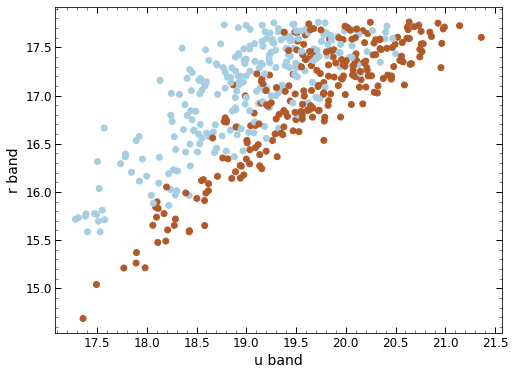

In [4]:
plt.figure(figsize=(8, 6), facecolor='none')
plt.scatter(ur[:, 0], ur[:, 1], c=y, cmap=cmap)

plt.xlabel('u band', fontsize='14')
plt.ylabel('r band', fontsize='14')
plt.minorticks_on()
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(ur, y, random_state=42)

# Model 1: Linear SVC version
# Create a pipeline
clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=1000, loss="hinge", max_iter=100000000))
])

# Train the model
clf_linSVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))


Train set accuracy = 0.7946666666666666
Test set accuracy = 0.8095238095238095


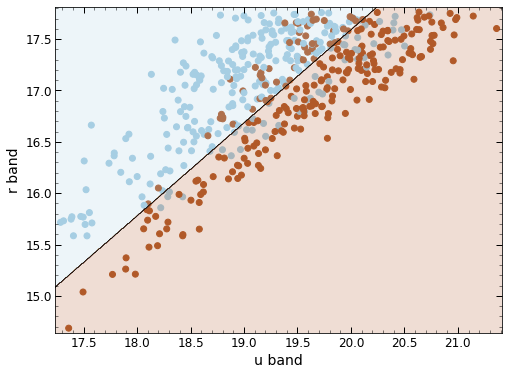

In [6]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:, 0].min() - 10*h, X[:, 0].max() + 10*h
    y_min, y_max = X[:, 1].min() - 10*h, X[:, 1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)  # Data points

    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    plt.xlabel('u band', fontsize='14')
    plt.ylabel('r band', fontsize='14')
    plt.minorticks_on()
    plt.tick_params(which='both', labelsize='12',
                    direction='in', top='1', right='1')
    plt.tick_params(which='major',  length=6, width=1)
    plt.tick_params(which='minor',  length=3, width=0.5)

plot_decision_boundary(clf_linSVC, ur, y)


C = 50, gamma = 2
Train set accuracy = 0.8053333333333333
Test set accuracy = 0.8095238095238095


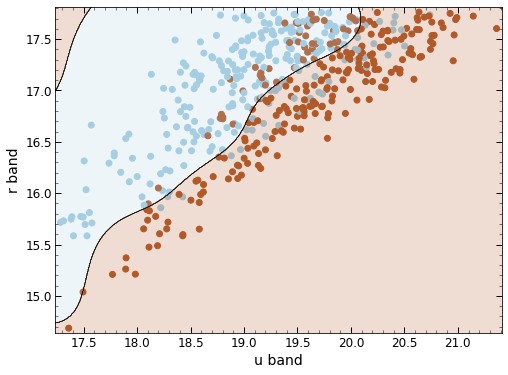

In [7]:
# Model 2: RBF Kernel version
# Create a pipeline
def rbf_svc(X_train, X_test, y_train, y_test, C, gamma, x):
    clf_rbfSVC = Pipeline([
        ("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma, max_iter=10000))
    ])

    # Train the model
    clf_rbfSVC.fit(X_train, y_train)

    # Evaluate the model's accuracy
    print('C = ' + str(C) + ', ' + 'gamma = ' + str(gamma))
    print("Train set accuracy = " + str(clf_rbfSVC.score(X_train, y_train)))
    print("Test set accuracy = " + str(clf_rbfSVC.score(X_test, y_test)))
    plot_decision_boundary(clf_rbfSVC, x, y)


rbf_svc(X_train, X_test, y_train, y_test, 50, 2, ur)


In [8]:
# Model 2: RBF Kernel loop version
C_list = range(1, 51, 1)
gamma_list = range(1, 11, 1)


def rbf_svc_loop(X_train, X_test, y_train, y_test, C_list, gamma_list):
    rbf_list = []

    for C in C_list:
        for gamma in gamma_list:
            clf_rbfSVC = Pipeline(
                [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma, max_iter=10000))])

            clf_rbfSVC.fit(X_train, y_train)

            train = clf_rbfSVC.score(X_train, y_train)
            test = clf_rbfSVC.score(X_test, y_test)
            rbf_list += [(C, gamma, train, test)]

    POS = 3
    rbf_max = (0, 0, 0, 0)
    for rbf in rbf_list:
        if rbf_max[POS] < rbf[POS]:
            rbf_max = rbf

    C_max = rbf_max[0]
    gamma_max = rbf_max[1]
    train_max = rbf_max[2]
    test_max = rbf_max[3]

    return C_max, gamma_max, train_max, test_max


C_max, gamma_max, train_max, test_max = rbf_svc_loop(
    X_train, X_test, y_train, y_test, C_list, gamma_list)


C = 2, gamma = 1
Train set accuracy = 0.808
Test set accuracy = 0.8174603174603174


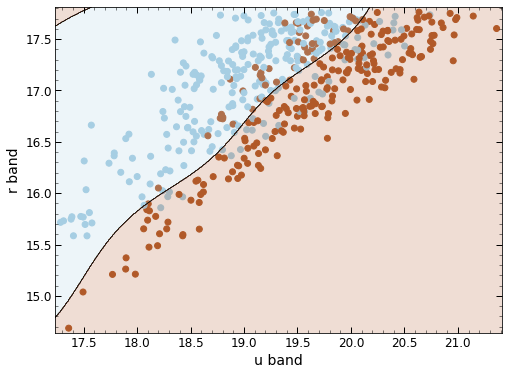

In [9]:
rbf_svc(X_train, X_test, y_train, y_test, C_max, gamma_max, ur)
